<a href="https://colab.research.google.com/github/BondaiKa/Car-Model-Classification/blob/master/MainWorker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
import os 
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
tf.config.list_physical_devices("GPU")

[]

In [43]:
DATASET_DIR = "./GRZ_and_model_recognition/learn/"
NUM_CLASSES = 11

In [45]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
data_dir = os.listdir('./GRZ_and_model_recognition/learn/')
data_dir

['TOYOTA_RAV4_B',
 'MAZDA_3_B',
 'VOLKSWAGEN_POLA_B',
 'KIA_RIA_B',
 'KAMAZ_ALLKAMAZ_C',
 'SCANIA_ALLSCANIA_C',
 'RENAULT_DUSTER_B',
 'VOLVO_ALLVOLVO_C',
 'HYUNDAI_SOLARIS_B',
 'LADA_PRIORA_B',
 'VOLKSWAGEN_TIGUAN_B']

In [46]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="training",
  seed=123
)

Found 156370 files belonging to 11 classes.
Using 125096 files for training.


In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
)

Found 156370 files belonging to 11 classes.
Using 31274 files for validation.


In [48]:
class_names = train_ds.class_names
class_names

['HYUNDAI_SOLARIS_B',
 'KAMAZ_ALLKAMAZ_C',
 'KIA_RIA_B',
 'LADA_PRIORA_B',
 'MAZDA_3_B',
 'RENAULT_DUSTER_B',
 'SCANIA_ALLSCANIA_C',
 'TOYOTA_RAV4_B',
 'VOLKSWAGEN_POLA_B',
 'VOLKSWAGEN_TIGUAN_B',
 'VOLVO_ALLVOLVO_C']

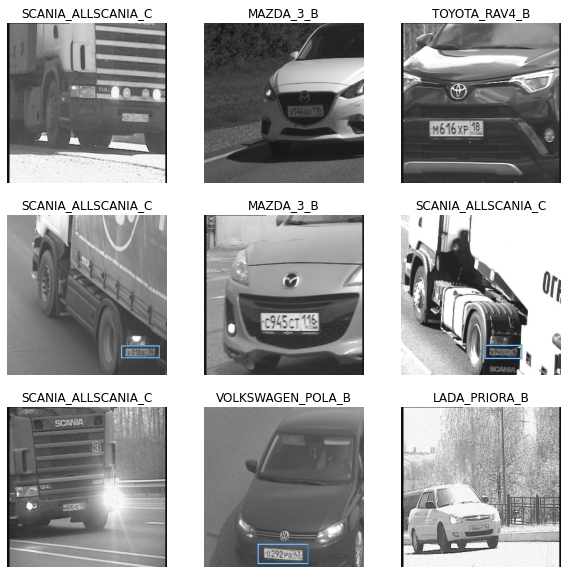

In [49]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [50]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [57]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    use_multiprocessing=True,
    callbacks=[tensorboard_callback],
)

Epoch 1/3
   2/3910 [..............................] - ETA: 43:51 - loss: 1.9685 - accuracy: 0.3125

KeyboardInterrupt: 

In [ ]:
%tensorboard --logdir logs/scalars